# Titanic dataset
El Titanic Dataset contiene información sobre los pasajeros del Titanic, incluyendo detalles personales y datos sobre su experiencia a bordo, así como si sobrevivieron o no al naufragio. Este dataset se utiliza comúnmente para problemas de clasificación, específicamente para predecir la probabilidad de supervivencia de un pasajero basado en sus características.

A continuación, se describen los principales atributos del Titanic Dataset:

<ul>
<li>PassengerId: Identificador único del pasajero. Tipo numérico.</li>
<li>Survived: Indica si el pasajero sobrevivió (1) o no (0). Tipo binario. Variable a predecir</li>
<li>Pclass: Clase del billete del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera). Tipo numérico.</li>
<li>Name: Nombre del pasajero. Tipo categórico.</li>
<li>Sex: Sexo del pasajero. Tipo categórico.</li>
<li>Age: Edad del pasajero en años. Tipo numérico.</li>
<li>SibSp: Número de hermanos/cónyuges a bordo del Titanic. Tipo numérico.</li>
<li>Parch: Número de padres/hijos a bordo del Titanic. Tipo numérico.</li>
<li>Ticket: Número de billete del pasajero. Tipo categórico.</li>
<li>Fare: Tarifa del pasajero. Tipo numérico.</li>
<li>Cabin: Número de cabina del pasajero. Tipo categórico.</li>
<li>Embarked: Puerto de embarque (C = Cherburgo; Q = Queenstown; S = Southampton). Tipo categórico.</li>
<ul>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import drive
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from functools import reduce

## Cargar datos y realizar un primer análisis

In [ ]:
# Conexión con google drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/proyecto-python/titanic.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer los datos del csv
df = pd.read_csv(path, header=0, delimiter=',')

In [ ]:
# Ver los datos cargados
print("Estructura de los datos:")
df.head()

Estructura de los datos:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Imprime como tabla
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Información del dataframe
# Cuantos atributos de cada tipo, cuantos no nulos...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Estadisticas basicas de las columnas numéricas
# Media, std, mínimo, máximo...
estadisticas_numericas = df.describe()
estadisticas_numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Media de una columna con dos decimales
media_columna = df['Age'].mean()
media_columna = round(media_columna, 2)
print("La media de la columna 'Age' es:", media_columna)

La media de la columna 'Age' es: 29.7


In [ ]:
# Desviación estándar de una columna e imprimir con formato
std_columna = df['Age'].std()
print("La desviacion estandar de la columna 'Age' es: {:.2f}".format(std_columna))

La desviacion estandar de la columna 'Age' es: 14.53


In [ ]:
# Número de filas y columnas
print("\nNumero de filas y columnas:")
print(df.shape)


Numero de filas y columnas:
(891, 12)


In [ ]:
# Acceder a las filas
print("\nFilas solo:")
print(df.shape[0])

# Acceder a las columnas
print("\nColumnas solo:")
print(df.shape[1])


Filas solo:
891

Columnas solo:
12


In [ ]:
# Número de filas solo
print("Numero de filas: "+str(len(df)))

Numero de filas: 891


In [ ]:
# Nombre de las columnas
print("Nombres de las columnas:")
print(df.columns)

Nombres de las columnas:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Tipo de cada columna
print("\nTipo de cada columna:")
print(df.dtypes)


Tipo de cada columna:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Tipo de la variable df
print("Tipo de la variable df:")
print(type(df))

Tipo de la variable df:
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Convertir columna de int a str
df['Pclass'] = df['Pclass'].astype(str)

# Mostrar el tipo de la columna imprimiendo todo en una frase
print(f"\nTipo de la columna 'Pclass' {df['Pclass'].dtype} después de la conversión.")

# Convertir columna de str a int
df['Pclass'] = df['Pclass'].astype(int)

# Mostrar el tipo de la columna imprimiendo todo en una frase
print(f"\nTipo de la columna 'Pclass' {df['Pclass'].dtype} al finalizar de la conversión.")


Tipo de la columna 'Pclass' object después de la conversión.

Tipo de la columna 'Pclass' int64 al finalizar de la conversión.


## Tratamiento de los valores nulos

In [ ]:
# Número de filas con valores faltantes
# Evaluar si hay algun nulo a lo largo de las filas
# Si la fila tiene nulo devuelve true
print("\nNúmero de filas con valores faltantes:")
print(df.isnull().any(axis=1).sum())



Número de filas con valores faltantes:
708


In [ ]:
# Número de valores faltantes por columna
print("\nNúmero de valores faltantes por columna:")
print(df.isnull().sum())


Número de valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

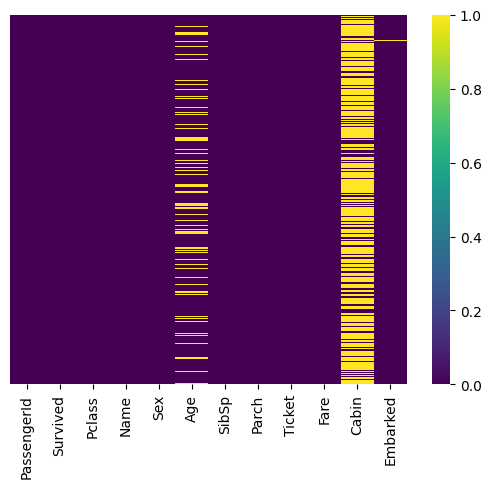

In [ ]:
# Analizar los nulos
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
# Solo Age, Embarked y Cabin tienen nulos

In [ ]:
# Eliminar la columna Cabin
# inplace para que se aplique sobre el dataframe original
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# ver resultado
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Reemplazar valores faltantes de Age por la media
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
# Ver número de nulos en columna
num_nulos = df['Age'].isnull().sum()
print("Número de valores nulos en la columna Age:", num_nulos)

Número de valores nulos en la columna Age: 0


In [ ]:
# Eliminar las filas que tengan nulo en la columna Embarked
df.dropna(subset=['Embarked'], inplace=True)

# La otra opción es rellenar valores faltantes en 'Embarked' con 'S'
df['Embarked'].fillna('S', inplace=True)

In [ ]:
# Volvemos a ver el número de filas con valores faltantes
# Evaluar si hay algun nulo a lo largo de las filas
# Si la fila tiene nulo devuelve true
print("\nNumero de filas con valores faltantes:")
print(df.isnull().any(axis=1).sum())


Numero de filas con valores faltantes:
0


## Análisis de los datos

In [ ]:
# Seleccionar columnas por el tipo
columnas_categoricas = df.select_dtypes(include=['object']).columns
columnas_categoricas


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [ ]:
# Redefinimos las columnas categoricas
columnas_categoricas=['Sex', 'Embarked','Pclass']

Valores únicos de la columna Sex:
['male', 'female']

Valores diferentes en la columna 'Sex' y su proporción:
Sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64



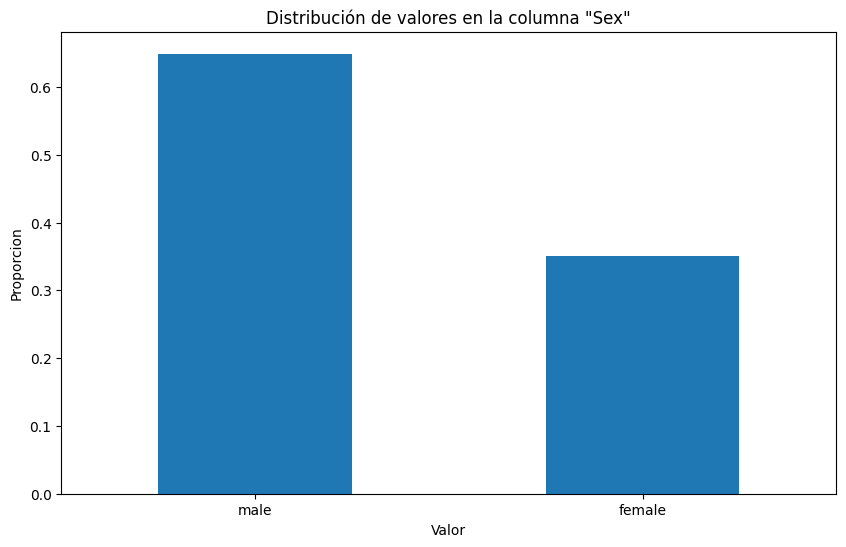

Valores únicos de la columna Embarked:
['S', 'C', 'Q']

Valores diferentes en la columna 'Embarked' y su proporción:
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64



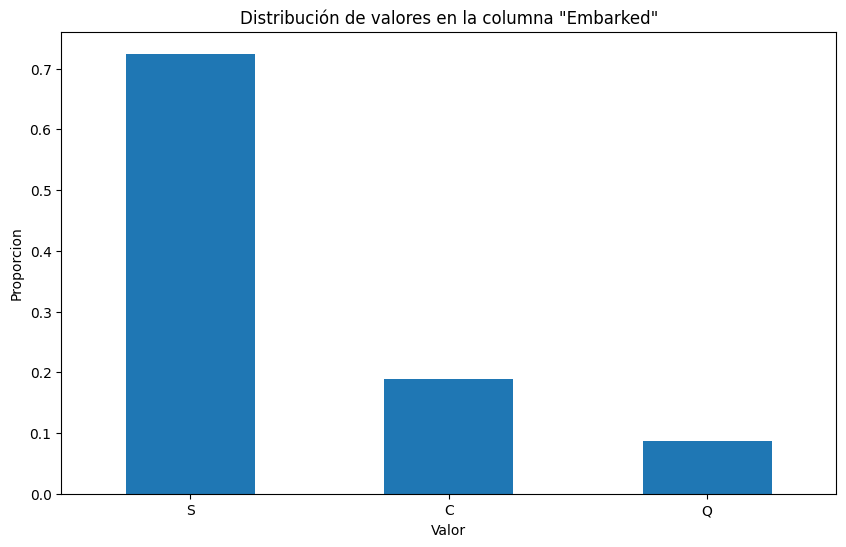

Valores únicos de la columna Pclass:
[3, 1, 2]

Valores diferentes en la columna 'Pclass' y su proporción:
Pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64



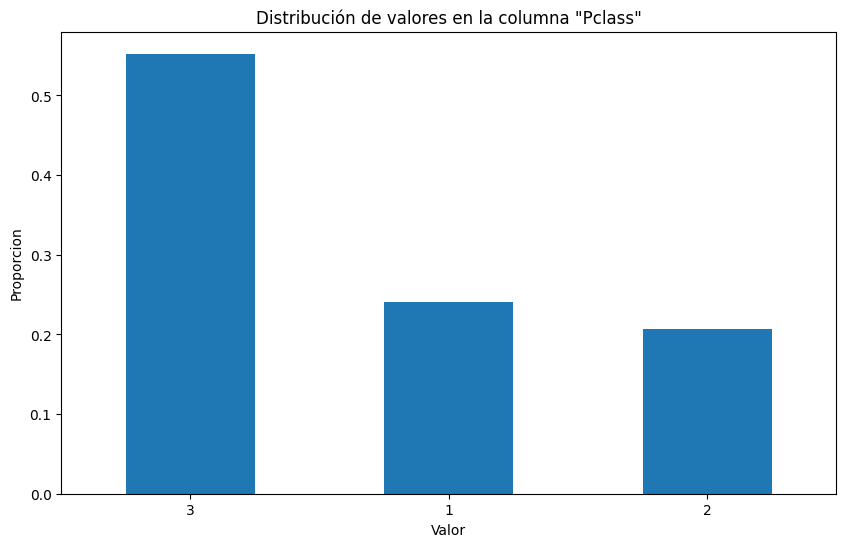

In [ ]:
# Iterar sobre estas columnas
for columna in columnas_categoricas:

    # Valores únicos de la columna en forma de lista
    valores_unicos_lista = df[columna].unique().tolist()
    print(f"Valores únicos de la columna {columna}:")
    print(valores_unicos_lista)

    # Obtener los valores únicos y sus frecuencias en proporciones. Si se quita normalize muestra la cuenta
    valores_unicos = df[columna].value_counts(normalize=True)

    # Imprimir los valores diferentes y su proporción
    print(f"\nValores diferentes en la columna '{columna}' y su proporción:")
    print(valores_unicos)
    print()

    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))
    valores_unicos.plot(kind='bar')

    # Configurar etiquetas y título
    plt.title(f'Distribución de valores en la columna "{columna}"')
    plt.xlabel('Valor')
    plt.ylabel('Proporcion')
    # Para que se muestren etiquetas en horizontal
    plt.xticks(rotation=0)

    # Mostrar el gráfico
    plt.show()


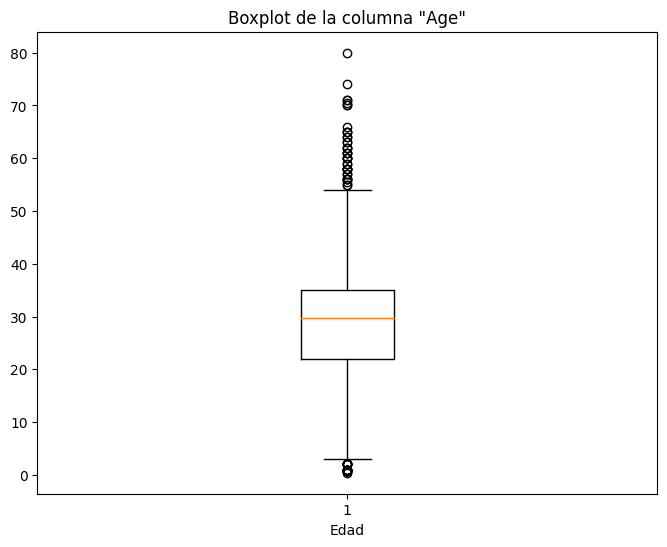

In [ ]:
# Crear un boxplot sobre los datos de la columna Age
plt.figure(figsize=(8, 6))
# Se eliminan los valores nulos si existen
plt.boxplot(df['Age'].dropna(), vert=True)
plt.title('Boxplot de la columna "Age"')
plt.xlabel('Edad')
plt.show()

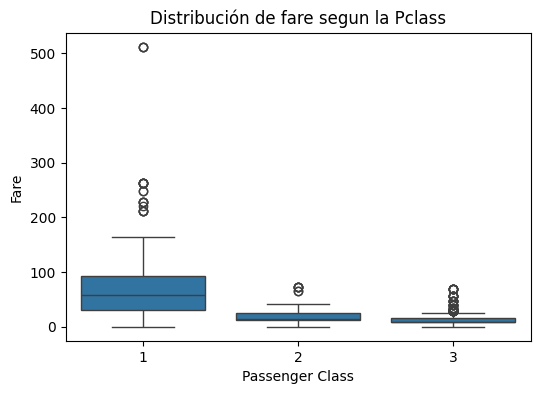

In [ ]:
# Boxplot Fare y Clase
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribución de fare segun la Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()
# Los que más pagaron, iban en la clase 1

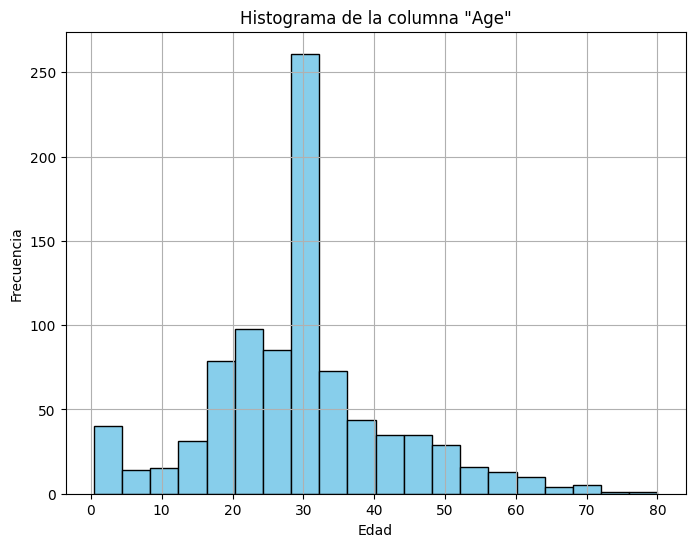

In [ ]:
# Crear un histograma de la columna Age
# Primero se define el tamaño
plt.figure(figsize=(8, 6))
# Se eliminan los valores nulos si existen
# Bins se refiere al número de separaciones, edgecolor borde
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la columna "Age"')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# Lineas del fondo
plt.grid(True)
plt.show()

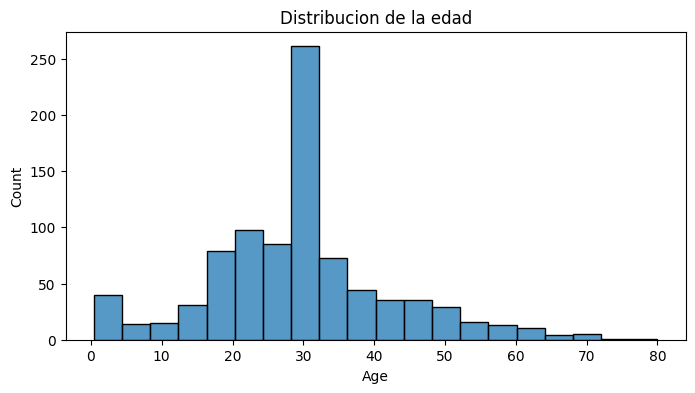

In [ ]:
# Histograma similar con seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=False)
plt.title('Distribucion de la edad')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

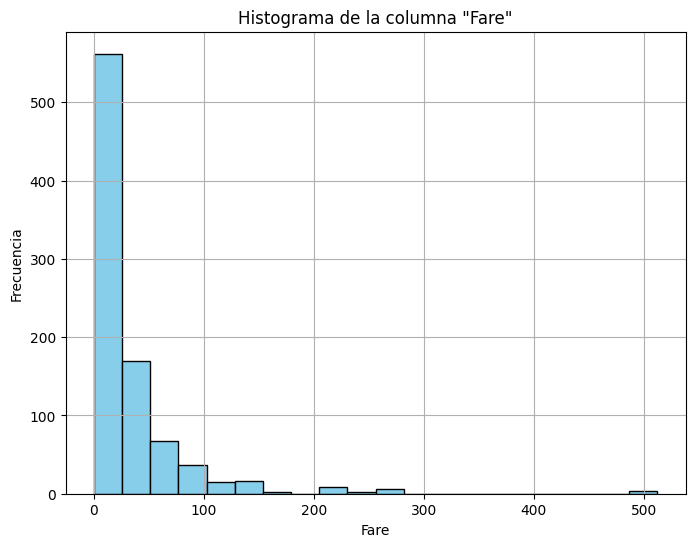

In [ ]:
# Crear un histograma de la columna fare
plt.figure(figsize=(8, 6))
plt.hist(df['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la columna "Fare"')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
# Muestra líneas de cuadrícula
plt.grid(True)
plt.show()

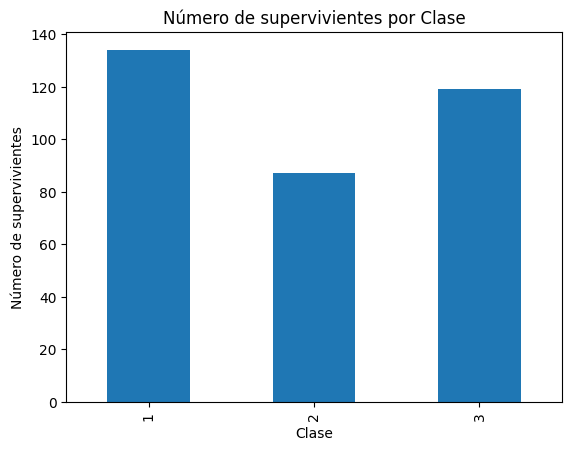

In [ ]:
# Gráfico de barras con el número de supervivientes por clase
# Agrupamos primero por la clase y supervivientes
survived_by_class = df.groupby('Pclass')['Survived'].sum()
survived_by_class.plot(kind='bar')
plt.title('Número de supervivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de supervivientes')
plt.show()

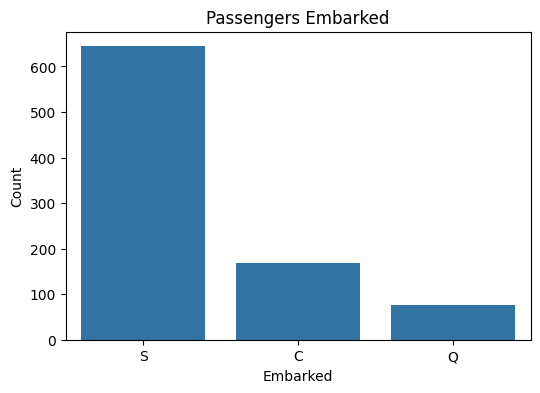

In [ ]:
# Pasajeros embarcados por puerto
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Passengers Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()
# Más gente embarcó en el puerto S

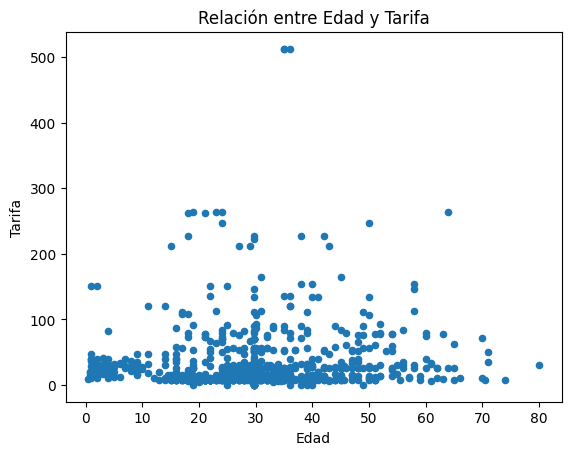

In [ ]:
# Gráfico de dispersión con la relación entre edad y tarifa
df.plot(kind='scatter', x='Age', y='Fare')
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

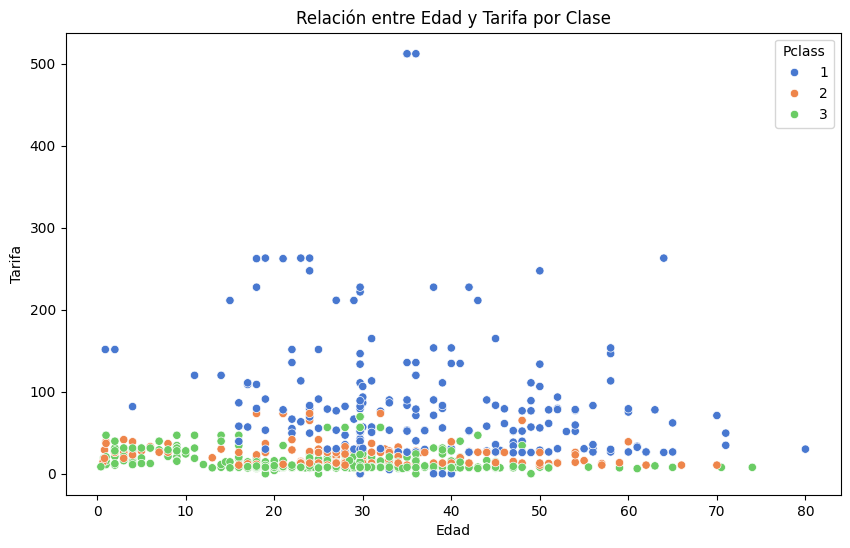

In [ ]:
# Crear el gráfico de dispersión en este caso con seaborn
plt.figure(figsize=(10, 6))
# Hue añade dimensión en colores
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='muted')
plt.title('Relación entre Edad y Tarifa por Clase')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

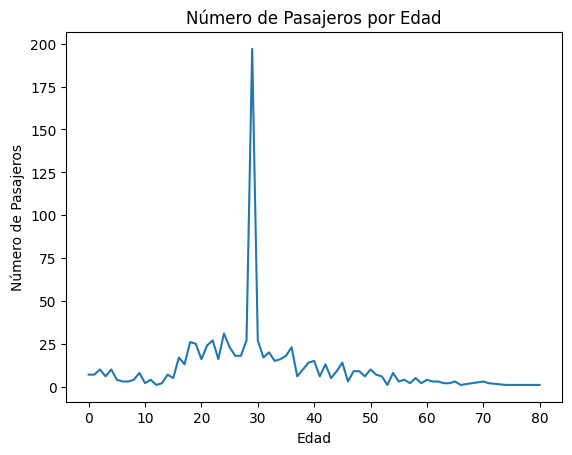

In [ ]:
# Gráfico de líneas con el número de pasajeros por edad (agrupar por rangos de edad)
# Elimina nulos, convierte a int, cuenta filas con cada elemento y ordena
age_groups = df['Age'].dropna().astype(int).value_counts().sort_index()
age_groups.plot(kind='line')
plt.title('Número de Pasajeros por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.show()

In [ ]:
# Imprimir valores obtenidos
print("Número de pasajeros por edad:")
print(age_groups)

Número de pasajeros por edad:
Age
0      7
1      7
2     10
3      6
4     10
      ..
66     1
70     3
71     2
74     1
80     1
Name: count, Length: 71, dtype: int64


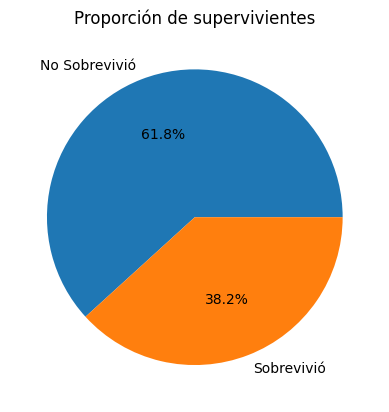

In [ ]:
# Gráfico circular con la proporción de supervivientes y no supervivientes
survived_counts = df['Survived'].value_counts()
survived_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Proporción de supervivientes')
plt.ylabel('')  # Para evitar la etiqueta del eje y
plt.show()

In [ ]:
# Imprimir valores obtenidos
print("\nNúmero de supervivientes y no supervivientes:")
print(survived_counts)


Número de supervivientes y no supervivientes:
Survived
0    549
1    340
Name: count, dtype: int64


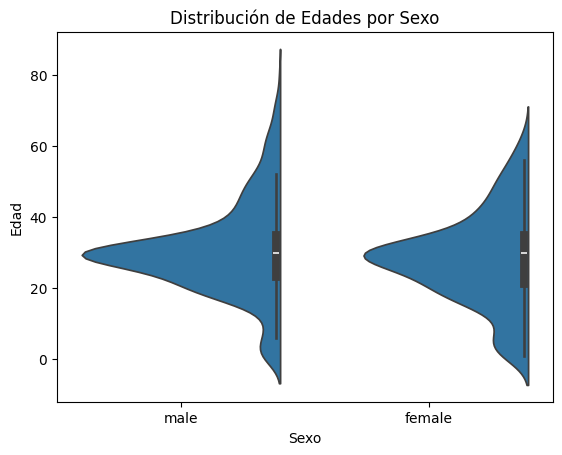

In [ ]:
# Gráfico de violín con distribución de edades por sexo
# Split con true divide el gráfico en dos partes, en este caso por el género
sns.violinplot(x='Sex', y='Age', data=df, split=True)
plt.title('Distribución de Edades por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

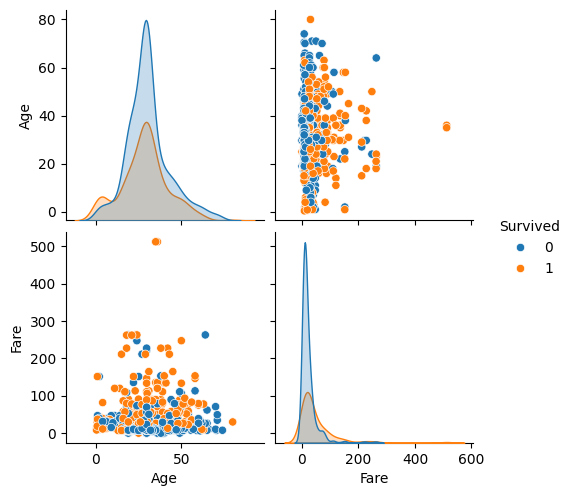

In [ ]:
# Gráfico de parejas con relación entre varias variables numéricas
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue='Survived')
plt.show()

<ipython-input-44-829cdc7db615>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
<ipython-input-44-829cdc7db615>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


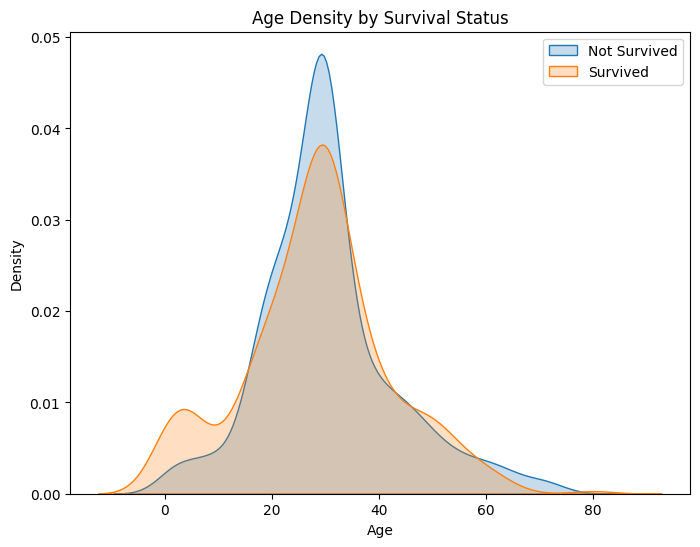

In [ ]:
# Gráfica de densidad con supervivencia por edad
plt.figure(figsize=(8, 6))
# Shade con true sombrea el área bajo la curva
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Age Density by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
# Los mas jóvenes sobrevivieron más

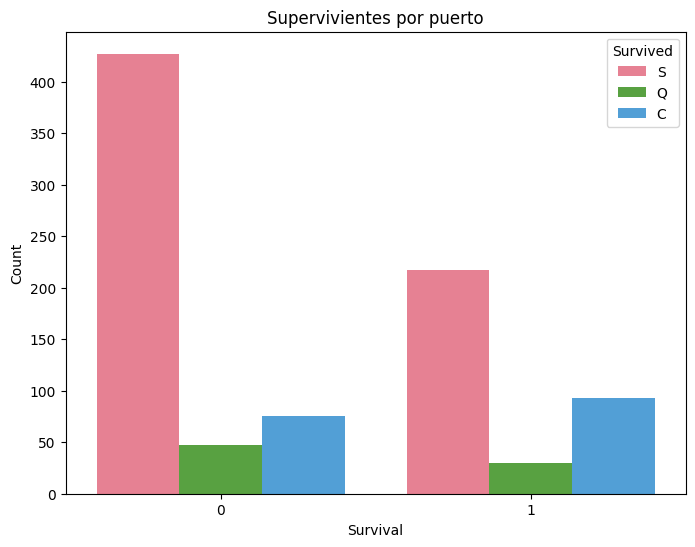

In [ ]:
# Supervivientes por puerto
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=df, palette='husl')
plt.title('Supervivientes por puerto')
plt.xlabel('Survival')
plt.ylabel('Count')
# Leyenda arriba a la derecha
plt.legend(title='Survived', loc='upper right')
plt.show()
# Los que embarcaron en S sobrevivieron menos

<Axes: xlabel='Pclass', ylabel='Age'>

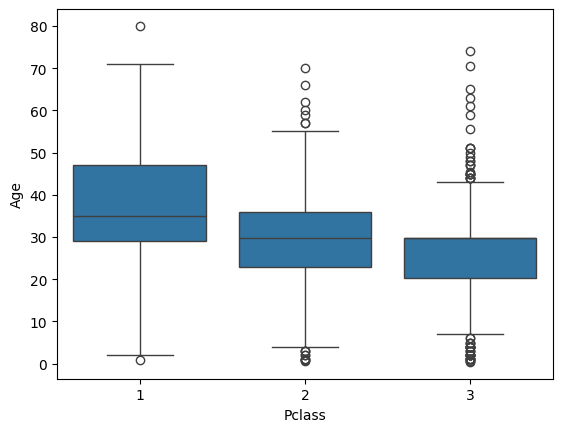

In [ ]:
# Boxplot por edad y clase
sns.boxplot(x="Pclass",y="Age",data=df)
# Los más mayores iban en clase 1 y los jóvenes en clase 3

<ipython-input-47-42f186efa222>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Embarked",y="Fare",data=df, palette=palette)


<Axes: xlabel='Embarked', ylabel='Fare'>

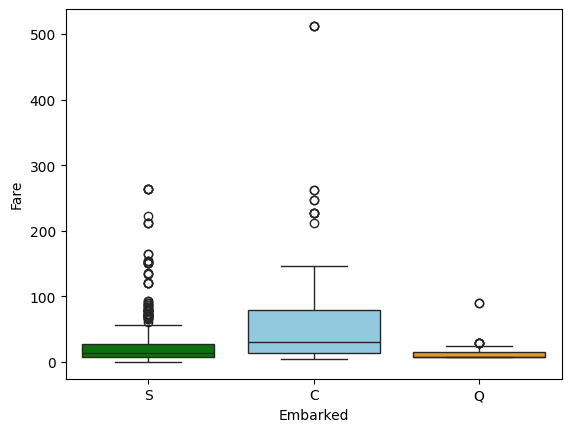

In [ ]:
# Definir los colores que quieres usar para cada nivel de 'Embarked'
palette = {"C": "skyblue", "Q": "orange", "S": "green"}
# Boxplot por fare y embarked
sns.boxplot(x="Embarked",y="Fare",data=df, palette=palette)
# En el puerto C la tarifa era más elevada

<Axes: xlabel='Survived', ylabel='Age'>

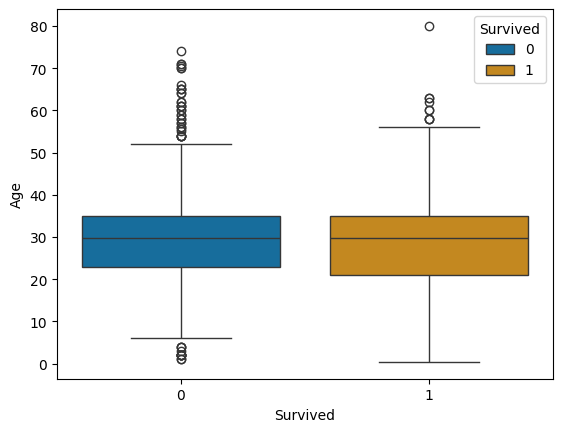

In [ ]:
# Boxplot si sobrevivieron o no por edad
# Valores para palette: 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind', 'husl', 'hls'
sns.boxplot(x="Survived",y="Age",data=df, hue="Survived", palette='colorblind')
# Los que sobrevivieron eran un poco más jóvenes

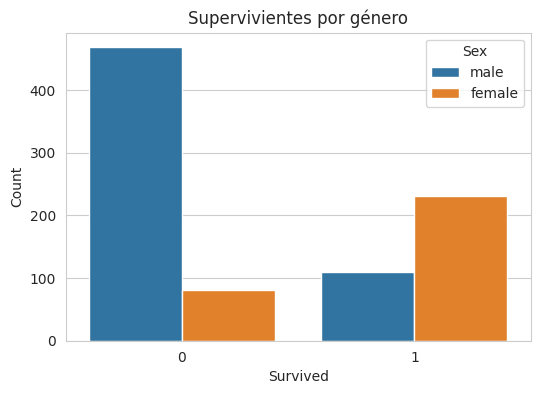

In [ ]:
# Supervivientes por género
# Fondo blanco con líneas de cuadrícula
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Supervivientes por género')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Los hombres sobrevivieron menos y murieron más en comparacion con las mujeres

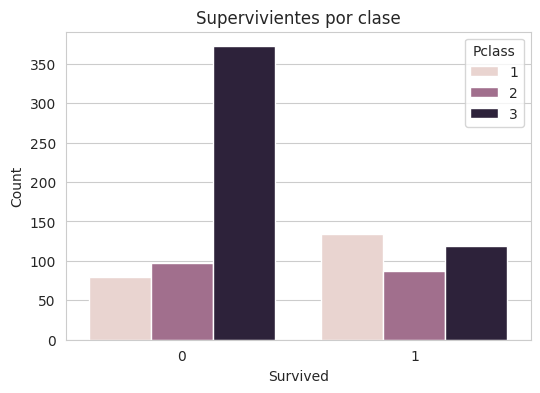

In [ ]:
# Supervivientes por clase
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Supervivientes por clase')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Los de la clase 3, murieron más

In [ ]:
# Número de pasajeros
total=len(df)
print("Total pasajeros: "+str(total))

Total pasajeros: 889


In [ ]:
# Porcentaje hombres y mujeres
condicion= df['Sex'] == 'male'
filas = round((condicion.sum()/total)*100,2)
print("Hombres: "+str(filas)+"% del total de pasajeros")

condicion = df['Sex'] == 'female'
filas = round((condicion.sum()/total)*100,2)
print("Mujeres: "+str(filas)+"% del total de pasajeros")

Hombres: 64.9% del total de pasajeros
Mujeres: 35.1% del total de pasajeros


In [ ]:
# Porcentajes sobrevivieron y no
condicion = df['Survived'] == 0
filas = round((condicion.sum()/total)*100,2)
print("No sobrevivieron: "+str(filas)+"% del total de pasajeros")

condicion = df['Survived'] == 1
filas = round((condicion.sum()/total)*100,2)
print("Sobrevivieron: "+str(filas)+"% del total de pasajeros")

No sobrevivieron: 61.75% del total de pasajeros
Sobrevivieron: 38.25% del total de pasajeros


In [ ]:
#Porcentaje por clase
condicion = df['Pclass'] == 1
filas = round((condicion.sum()/total)*100,2)
print("En clase 1: "+str(filas)+"% del total de pasajeros")

condicion = df['Pclass'] == 2
filas = round((condicion.sum()/total)*100,2)
print("En clase 2: "+str(filas)+"% del total de pasajeros")

condicion = df['Pclass'] == 3
filas = round((condicion.sum()/total)*100,2)
print("En clase 3: "+str(filas)+"% del total de pasajeros")

En clase 1: 24.07% del total de pasajeros
En clase 2: 20.7% del total de pasajeros
En clase 3: 55.23% del total de pasajeros


In [ ]:
# Porcentaje por puerto
condicion = df['Embarked'] == 'S'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en S: "+str(filas)+"% del total de pasajeros")

condicion = df['Embarked'] == 'C'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en C: "+str(filas)+"% del total de pasajeros")

condicion = df['Embarked'] == 'Q'
filas = round((condicion.sum()/total)*100,2)
print("Embarcados en Q: "+str(filas)+"% del total de pasajeros")

Embarcados en S: 72.44% del total de pasajeros
Embarcados en C: 18.9% del total de pasajeros
Embarcados en Q: 8.66% del total de pasajeros


In [ ]:
#Porcentaje por clase y si sobrevivieron
condicion = df['Pclass'] == 1
total = condicion.sum()
condicion2= df['Survived'] == 1
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 1 y sobrevivieron: "+str(filas)+"% del total de pasajeros que fueron en esa clase")


condicion = df['Pclass'] == 2
total = condicion.sum()
condicion2= df['Survived'] == 1
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 2 y sobrevivieron: "+str(filas)+"% del total de pasajeros que fueron en esa clase")


condicion = df['Pclass'] == 3
total = condicion.sum()
condicion2= df['Survived'] == 1
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("En clase 3 y sobrevivieron: "+str(filas)+"% del total de pasajeros que fueron en esa clase")

En clase 1 y sobrevivieron: 62.62% del total de pasajeros que fueron en esa clase
En clase 2 y sobrevivieron: 47.28% del total de pasajeros que fueron en esa clase
En clase 3 y sobrevivieron: 24.24% del total de pasajeros que fueron en esa clase


In [ ]:
#Porcentaje por género y si sobrevivieron
condicion = df['Sex'] == 'male'
total = condicion.sum()
condicion2=df['Survived'] == 1
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("Hombres y sobrevivieron: "+str(filas)+"% del total de pasajeros que eran hombres")

condicion = df['Sex'] == 'female'
total = condicion.sum()
condicion2= df['Survived'] == 1
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("Mujeres y sobrevivieron: "+str(filas)+"% del total de pasajeros que eran mujeres")

condicion = df['Sex'] == 'male'
total = condicion.sum()
condicion2=df['Survived'] == 0
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("Hombres y no sobrevivieron: "+str(filas)+"% del total de pasajeros que eran hombres")

condicion = df['Sex'] == 'female'
total = condicion.sum()
condicion2= df['Survived'] == 0
condicion=condicion & condicion2
filas = round((condicion.sum()/total)*100,2)
print("Mujeres y no sobrevivieron: "+str(filas)+"% del total de pasajeros que eran mujeres")

Hombres y sobrevivieron: 18.89% del total de pasajeros que eran hombres
Mujeres y sobrevivieron: 74.04% del total de pasajeros que eran mujeres
Hombres y no sobrevivieron: 81.11% del total de pasajeros que eran hombres
Mujeres y no sobrevivieron: 25.96% del total de pasajeros que eran mujeres


In [ ]:
#Porcentaje pasajeros sobrevivieron y murieron por clase
# Total de pasajeros por clase
total_por_clase = df['Pclass'].value_counts().sort_index()
print("Pasajeros por clase:")
print(total_por_clase)

# Total de pasajeros que sobrevivieron por clase
sobrevivieron_por_clase = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
print("Pasajeros sobrevivieron por clase:")
print(sobrevivieron_por_clase)

# Total de pasajeros que murieron por clase
murieron_por_clase = df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()
print("Pasajeros murieron por clase:")
print(sobrevivieron_por_clase)

# Porcentaje de pasajeros que sobrevivieron por clase
porcentaje_sobrevivieron_por_clase = (sobrevivieron_por_clase / total_por_clase) * 100
print("Porcentaje pasajeros sobrevivieron por clase:")
print(porcentaje_sobrevivieron_por_clase)

# Porcentaje de pasajeros que murieron por clase
porcentaje_murieron_por_clase = (murieron_por_clase / total_por_clase) * 100
print("Porcentaje pasajeros murieron por clase:")
print(porcentaje_murieron_por_clase)

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Total Pasajeros': total_por_clase,
    'Sobrevivieron': sobrevivieron_por_clase,
    '% Sobrevivieron': porcentaje_sobrevivieron_por_clase,
    'Murieron': murieron_por_clase,
    '% Murieron': porcentaje_murieron_por_clase
})

# Mostrar el DataFrame
print(resultados)


Pasajeros por clase:
Pclass
1    214
2    184
3    491
Name: count, dtype: int64
Pasajeros sobrevivieron por clase:
Pclass
1    134
2     87
3    119
Name: count, dtype: int64
Pasajeros murieron por clase:
Pclass
1    134
2     87
3    119
Name: count, dtype: int64
Porcentaje pasajeros sobrevivieron por clase:
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: count, dtype: float64
Porcentaje pasajeros murieron por clase:
Pclass
1    37.383178
2    52.717391
3    75.763747
Name: count, dtype: float64
        Total Pasajeros  Sobrevivieron  % Sobrevivieron  Murieron  % Murieron
Pclass                                                                       
1                   214            134        62.616822        80   37.383178
2                   184             87        47.282609        97   52.717391
3                   491            119        24.236253       372   75.763747


In [ ]:
# Contar el número de hombres y mujeres que sobrevivieron
survived_count = {'male': 0, 'female': 0}

# Iterar sobre las características y las etiquetas de supervivencia utilizando zip y enumerate
# zip toma dos o más iterables (como listas, tuplas, etc.) y los agrupa en pares de elementos
# enumerate toma un iterable y devuelve un objeto enumerado
for index, (sex, survived) in enumerate(zip(df['Sex'], df['Survived'])):
    if survived == 1:
        if sex == 'male':
            survived_count['male'] += 1
        elif sex == 'female':
            survived_count['female'] += 1

# Imprimir el número de hombres y mujeres que sobrevivieron
print("Número de hombres que sobrevivieron:", survived_count['male'])
print("Número de mujeres que sobrevivieron:", survived_count['female'])

Número de hombres que sobrevivieron: 109
Número de mujeres que sobrevivieron: 231


In [ ]:
# Definir la función de mapeo
def sex_to_numeric(sex):
    return 0 if sex == 'male' else 1

# Aplicar la función a la columna 'Sex' utilizando map
df['SexConverted'] = df['Sex'].map(sex_to_numeric)


# Otra forma más compacta usando lambda
df['SexConverted1'] = df['Sex'].map(lambda x: 0 if x == 'male' else 1)

In [ ]:
# Mostrar las primeras filas del DataFrame transformado
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  SexConverted  SexConverted1  
0      0         A/5 21171   7.2500        S             0              0  
1      0          PC 17599  71.2833        C             1              1  
2      0  STON/O2. 3101282   7.9250        S             1              1  
3      0        

In [ ]:
# Eliminar las columnas creadas
df.drop(['SexConverted','SexConverted1'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Aplicar filter para filtrar filas que cumplen condicion
# df.to_dict convierte el DataFrame en una lista de diccionarios, donde cada elemento representa una fila del DataFrame
adult_passengers_df = pd.DataFrame(list(filter(lambda x: x['Age'] > 30, df.to_dict(orient='records'))))

# Mostrar las primeras filas del DataFrame filtrado con lambda
print(adult_passengers_df.head())

   PassengerId  Survived  Pclass  \
0            2         1       1   
1            4         1       1   
2            5         0       3   
3            7         0       1   
4           12         1       1   

                                                Name     Sex   Age  SibSp  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                           Allen, Mr. William Henry    male  35.0      0   
3                            McCarthy, Mr. Timothy J    male  54.0      0   
4                           Bonnell, Miss. Elizabeth  female  58.0      0   

   Parch    Ticket     Fare Embarked  
0      0  PC 17599  71.2833        C  
1      0    113803  53.1000        S  
2      0    373450   8.0500        S  
3      0     17463  51.8625        S  
4      0    113783  26.5500        S  


In [ ]:
# Definir la función de reducción
def sum_fares(accumulated_sum, fare):
    return accumulated_sum + fare

# Aplicar reduce para obtener la suma de todas las tarifas
# 0 es el valor inicial
total_fare = reduce(sum_fares, df['Fare'], 0)
# Mostrar el resultado
print(f'Total Fare: {total_fare}')

Total Fare: 28533.949299999967


In [ ]:
# Otra forma más compacta usando lambda
total_fare_lambda = reduce(lambda acc, fare: acc + fare, df['Fare'], 0)

# Mostrar el resultado con lambda
print(f'Total Fare with lambda: {total_fare_lambda}')

Total Fare with lambda: 28533.949299999967


In [ ]:
# Enumerar los pasajeros junto con su índice
# df.iterrows(): Este método devuelve un generador que produce pares de tuplas con el indice y los datos de la fila
# enumerate: Esta función toma un iterable y devuelve un objeto enumerado con el indice y los datos
for indice, pasajero in enumerate(df.iterrows()):
    nombre=pasajero[1]['Name']
    print(f"Pasajero {indice + 1}: {nombre}")

Pasajero 1: Braund, Mr. Owen Harris
Pasajero 2: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Pasajero 3: Heikkinen, Miss. Laina
Pasajero 4: Futrelle, Mrs. Jacques Heath (Lily May Peel)
Pasajero 5: Allen, Mr. William Henry
Pasajero 6: Moran, Mr. James
Pasajero 7: McCarthy, Mr. Timothy J
Pasajero 8: Palsson, Master. Gosta Leonard
Pasajero 9: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Pasajero 10: Nasser, Mrs. Nicholas (Adele Achem)
Pasajero 11: Sandstrom, Miss. Marguerite Rut
Pasajero 12: Bonnell, Miss. Elizabeth
Pasajero 13: Saundercock, Mr. William Henry
Pasajero 14: Andersson, Mr. Anders Johan
Pasajero 15: Vestrom, Miss. Hulda Amanda Adolfina
Pasajero 16: Hewlett, Mrs. (Mary D Kingcome) 
Pasajero 17: Rice, Master. Eugene
Pasajero 18: Williams, Mr. Charles Eugene
Pasajero 19: Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Pasajero 20: Masselmani, Mrs. Fatima
Pasajero 21: Fynney, Mr. Joseph J
Pasajero 22: Beesley, Mr. Lawrence
Pasajero 23: McGowan, Miss. Anna "Ann

In [ ]:

# Ordenar los pasajeros por edad de forma ascendente
sorted_by_age_asc = sorted(df.iterrows(), key=lambda x: x[1]['Age'])
#print(sorted_by_age_asc)

# Imprimir los primeros 5 pasajeros más jóvenes
print("Pasajeros más jóvenes:")
for i, (index, passenger) in enumerate(sorted_by_age_asc[:5], 1):
    print(f"{i}. {passenger['Name']}, Edad: {passenger['Age']}")

Pasajeros más jóvenes:
1. Thomas, Master. Assad Alexander, Edad: 0.42
2. Hamalainen, Master. Viljo, Edad: 0.67
3. Baclini, Miss. Helene Barbara, Edad: 0.75
4. Baclini, Miss. Eugenie, Edad: 0.75
5. Caldwell, Master. Alden Gates, Edad: 0.83


In [ ]:
# Tarifa media por puerto
tarifa_media_por_puerto = df.groupby('Embarked')['Fare'].mean().sort_index()
tarifa_media_por_puerto

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [ ]:
# Suma de las tarifas por clase
suma_tarifas_por_clase = df.groupby('Pclass')['Fare'].sum().sort_values(ascending=True)
suma_tarifas_por_clase

Pclass
2     3801.8417
3     6714.6951
1    18017.4125
Name: Fare, dtype: float64

In [ ]:
# Calcular la tarifa máxima por combinación de puerto y clase
tarifa_maxima_por_combinacion = df.groupby(['Embarked', 'Pclass'])['Fare'].max()
tarifa_maxima_por_combinacion

Embarked  Pclass
C         1         512.3292
          2          41.5792
          3          22.3583
Q         1          90.0000
          2          12.3500
          3          29.1250
S         1         263.0000
          2          73.5000
          3          69.5500
Name: Fare, dtype: float64

In [ ]:
# Edad media supervivientes del puerto "S" en la clase 1
# Filtrar los supervivientes en el puerto "S" que iban en la clase 1
filtro = (df['Survived'] == 1) & (df['Embarked'] == 'S') & (df['Pclass'] == 1)
pasajeros_filtrados = df[filtro]
print("Pasajeros que sobrevivieron de S y de la clase 1:")
print(pasajeros_filtrados)

# Calcular la edad media de los pasajeros filtrados
edad_media_supervivientes_puerto_s_clase_1 = pasajeros_filtrados['Age'].mean()

# Mostrar la edad media de los supervivientes en el puerto "S" que iban en la clase 1
print("Edad media de los supervivientes en el puerto 'S' que iban en la clase 1:", edad_media_supervivientes_puerto_s_clase_1)


Pasajeros que sobrevivieron de S y de la clase 1:
     PassengerId  Survived  Pclass  \
3              4         1       1   
11            12         1       1   
23            24         1       1   
55            56         1       1   
88            89         1       1   
..           ...       ...     ...   
856          857         1       1   
857          858         1       1   
862          863         1       1   
871          872         1       1   
887          888         1       1   

                                                  Name     Sex        Age  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
23                        Sloper, Mr. William Thompson    male  28.000000   
55                                   Woolner, Mr. Hugh    male  29.699118   
88                          Fortune, Miss. Mabel Helen  female  23.000000   
..                             

In [ ]:
# Número de pasajeros que no iban en la clase 1 y embarcaron en "S" o "C" y su edad era entre 15 y 35
# Filtrar pasajeros que no iban en la clase 1
# y que embarcaron en los puertos "S" o "C" y cuyas edades estaban entre 15 y 35 años
filtro = ((df['Pclass'] != 1) & (df['Embarked'].isin(['S', 'C'])) & (df['Age'] >= 15) & (df['Age'] <= 35))
pasajeros_filtrados = df[filtro]
print("Pasajeros filtrados:")
print(pasajeros_filtrados)

# Calcular el número de pasajeros que cumplen con las condiciones
numero_pasajeros = pasajeros_filtrados.shape[0]

# Mostrar el número de pasajeros que cumplen con las condiciones
print("Número de pasajeros que no iban en la clase 1, embarcaron en los puertos 'S' o 'C' y cuyas edades estaban entre 15 y 35 años:", numero_pasajeros)


Pasajeros filtrados:
     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
8              9         1       3   
12            13         0       3   
..           ...       ...     ...   
882          883         0       3   
883          884         0       2   
884          885         0       3   
886          887         0       2   
888          889         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
4                             Allen, Mr. William Henry    male  35.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
..                                                 ...     .

In [ ]:
# Porcentaje de pasajeros que iban en cada clase en cada puerto
# Filtrar los pasajeros en cada clase en cada puerto
conteo_por_clase_puerto = df.groupby(['Embarked', 'Pclass']).size()
print("Pasajeros por clase y puerto:")
print(conteo_por_clase_puerto)

# Calcular el total de pasajeros en cada puerto
total_por_puerto = df['Embarked'].value_counts()
print("Pasajeros por puerto:")
print(total_por_puerto)

# Calcular el porcentaje de pasajeros en cada clase en cada puerto respecto al total de pasajeros en ese puerto
porcentaje_por_clase_puerto = (conteo_por_clase_puerto / total_por_puerto) * 100

# Mostrar el porcentaje de pasajeros que iban en cada clase en cada puerto sobre el total de pasajeros en cada puerto
print("Porcentaje de pasajeros que iban en cada clase en cada puerto:")
print(porcentaje_por_clase_puerto)


Pasajeros por clase y puerto:
Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64
Pasajeros por puerto:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Porcentaje de pasajeros que iban en cada clase en cada puerto:
Embarked  Pclass
C         1         50.595238
          2         10.119048
          3         39.285714
Q         1          2.597403
          2          3.896104
          3         93.506494
S         1         19.720497
          2         25.465839
          3         54.813665
dtype: float64


In [ ]:
# Crear la columna de intervalo de edad
df['Edad_Rango'] = df['Age'].apply(lambda x: f"{math.floor(x/5)*5}-{math.floor(x/5)*5 + 5}")


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,35-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,25-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,35-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,35-40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,25-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,15-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,25-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,25-30


In [ ]:
# Agrupar los pasajeros por intervalo de edad
conteo_por_intervalo_edad = df['Edad_Rango'].value_counts()
print("Pasajeros agrupados por intervalo de edad:")
print(conteo_por_intervalo_edad)

# Calcular el total de pasajeros
total_pasajeros = len(df)

Pasajeros agrupados por intervalo de edad:
Edad_Rango
25-30    283
20-25    114
30-35     95
15-20     86
35-40     71
40-45     48
45-50     41
0-5       40
50-55     32
5-10      22
10-15     16
55-60     16
60-65     14
70-75      6
65-70      4
80-85      1
Name: count, dtype: int64


In [ ]:
# Calcular el porcentaje de pasajeros en cada intervalo de edad respecto al total de pasajeros
porcentaje_por_intervalo_edad = (conteo_por_intervalo_edad / total_pasajeros) * 100
print("Porcentaje pasajeros en cada intervalo:")
print(porcentaje_por_intervalo_edad)

# Mostrar cuantos pasajeros hay en cada intervalo de edad y su porcentaje sobre el total de pasajeros. Juntamos dataframes
print("Número de pasajeros en cada intervalo de edad y su porcentaje sobre el total de pasajeros:")
print(pd.concat([conteo_por_intervalo_edad, porcentaje_por_intervalo_edad], axis=1, keys=['Cantidad', 'Porcentaje']))


Porcentaje pasajeros en cada intervalo:
Edad_Rango
25-30    31.833521
20-25    12.823397
30-35    10.686164
15-20     9.673791
35-40     7.986502
40-45     5.399325
45-50     4.611924
0-5       4.499438
50-55     3.599550
5-10      2.474691
10-15     1.799775
55-60     1.799775
60-65     1.574803
70-75     0.674916
65-70     0.449944
80-85     0.112486
Name: count, dtype: float64
Número de pasajeros en cada intervalo de edad y su porcentaje sobre el total de pasajeros:
            Cantidad  Porcentaje
Edad_Rango                      
25-30            283   31.833521
20-25            114   12.823397
30-35             95   10.686164
15-20             86    9.673791
35-40             71    7.986502
40-45             48    5.399325
45-50             41    4.611924
0-5               40    4.499438
50-55             32    3.599550
5-10              22    2.474691
10-15             16    1.799775
55-60             16    1.799775
60-65             14    1.574803
70-75              6    0.67491

In [ ]:
# Agrupar los pasajeros por intervalo de edad y género
grupo_por_intervalo_edad_genero = df.groupby(['Edad_Rango', 'Sex'])
conteo_por_grupo = grupo_por_intervalo_edad_genero.size().reset_index(name='Count')
print("Pasajeros por grupo de edad y género:")
print(conteo_por_grupo)

Pasajeros por grupo de edad y género:
   Edad_Rango     Sex  Count
0         0-5  female     17
1         0-5    male     23
2       10-15  female      9
3       10-15    male      7
4       15-20  female     36
5       15-20    male     50
6       20-25  female     42
7       20-25    male     72
8       25-30  female     83
9       25-30    male    200
10      30-35  female     33
11      30-35    male     62
12      35-40  female     26
13      35-40    male     45
14      40-45  female     18
15      40-45    male     30
16      45-50  female     14
17      45-50    male     27
18       5-10  female     13
19       5-10    male      9
20      50-55  female     12
21      50-55    male     20
22      55-60  female      6
23      55-60    male     10
24      60-65  female      3
25      60-65    male     11
26      65-70    male      4
27      70-75    male      6
28      80-85    male      1


In [ ]:
# Contar el número de pasajeros que sobrevivieron o no en cada intervalo de edad y género
conteo_supervivientes_por_intervalo_edad_genero = grupo_por_intervalo_edad_genero['Survived'].sum()
print("Pasajeros sobrevivieron por grupo de edad y género:")
print(conteo_supervivientes_por_intervalo_edad_genero)

conteo_no_supervivientes_por_intervalo_edad_genero = grupo_por_intervalo_edad_genero['Survived'].count() - conteo_supervivientes_por_intervalo_edad_genero
print("Pasajeros no sobrevivieron por grupo de edad y género:")
print(conteo_no_supervivientes_por_intervalo_edad_genero)


Pasajeros sobrevivieron por grupo de edad y género:
Edad_Rango  Sex   
0-5         female    12
            male      15
10-15       female     5
            male       2
15-20       female    29
            male       5
20-25       female    32
            male       7
25-30       female    56
            male      34
30-35       female    27
            male      13
35-40       female    22
            male      10
40-45       female    13
            male       5
45-50       female     9
            male       7
5-10        female     7
            male       4
50-55       female    11
            male       3
55-60       female     5
            male       1
60-65       female     3
            male       2
65-70       male       0
70-75       male       0
80-85       male       1
Name: Survived, dtype: int64
Pasajeros no sobrevivieron por grupo de edad y género:
Edad_Rango  Sex   
0-5         female      5
            male        8
10-15       female      4
            male       

In [ ]:
# Calcular el porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género respecto al total de pasajeros en ese intervalo y género
porcentaje_supervivientes_por_intervalo_edad_genero = (conteo_supervivientes_por_intervalo_edad_genero / conteo_por_intervalo_edad) * 100
porcentaje_no_supervivientes_por_intervalo_edad_genero = 100 - porcentaje_supervivientes_por_intervalo_edad_genero

# Mostrar el porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género. Juntar datos
print("\nPorcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género:")
print(pd.concat([porcentaje_supervivientes_por_intervalo_edad_genero, porcentaje_no_supervivientes_por_intervalo_edad_genero], axis=1, keys=['Supervivientes(%)', 'No supervivientes (%)']))



Porcentaje de pasajeros que sobrevivieron o no en cada intervalo de edad y género:
                   Supervivientes(%)  No supervivientes (%)
Edad_Rango Sex                                             
0-5        female          30.000000              70.000000
           male            37.500000              62.500000
10-15      female          31.250000              68.750000
           male            12.500000              87.500000
15-20      female          33.720930              66.279070
           male             5.813953              94.186047
20-25      female          28.070175              71.929825
           male             6.140351              93.859649
25-30      female          19.787986              80.212014
           male            12.014134              87.985866
30-35      female          28.421053              71.578947
           male            13.684211              86.315789
35-40      female          30.985915              69.014085
           male 

In [ ]:
# groupby en tres variables (Edad, Sexo y Clase)
resultado = df.groupby(['Edad_Rango', 'Sex', 'Pclass']).size().reset_index(name='Count')

# Mostrar los resultados
print(resultado)

   Edad_Rango     Sex  Pclass  Count
0         0-5  female       1      1
1         0-5  female       2      4
2         0-5  female       3     12
3         0-5    male       1      2
4         0-5    male       2      8
..        ...     ...     ...    ...
74      65-70    male       3      1
75      70-75    male       1      3
76      70-75    male       2      1
77      70-75    male       3      2
78      80-85    male       1      1

[79 rows x 4 columns]


In [ ]:
# Tabla de contingencia para Pclass y Survived
tabla_contingencia_2 = pd.crosstab(df['Pclass'], df['Survived'])
print("Tabla de Contingencia para pclass y survived:")
print(tabla_contingencia_2)

Tabla de Contingencia para pclass y survived:
Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


In [ ]:
# Agrupar los pasajeros por clase y si sobrevivieron
agrpacion_clase_sobrevivieron = df.groupby(['Pclass', 'Survived'])
conteo_por_grupo = agrpacion_clase_sobrevivieron.size().reset_index(name='Count')
print("Pasajeros por clase y si sobrevivieron:")
print(conteo_por_grupo)

# Eliminando reset_index
conteo_por_grupo = agrpacion_clase_sobrevivieron.size()
print("Pasajeros por clase y si sobrevivieron:")
print(conteo_por_grupo)

Pasajeros por clase y si sobrevivieron:
   Pclass  Survived  Count
0       1         0     80
1       1         1    134
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119
Pasajeros por clase y si sobrevivieron:
Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


In [ ]:
# Tabla de contingencia para pclass, sex, embarked y survived
tabla_contingencia_4 = pd.crosstab([df['Pclass'], df['Sex'], df['Embarked']], df['Survived'])
print("\nTabla de Contingencia para pclass, sex, embarked y survived:")
print(tabla_contingencia_4)


Tabla de Contingencia para pclass, sex, embarked y survived:
Survived                  0   1
Pclass Sex    Embarked         
1      female C           1  42
              Q           0   1
              S           2  46
       male   C          25  17
              Q           1   0
              S          51  28
2      female C           0   7
              Q           0   2
              S           6  61
       male   C           8   2
              Q           1   0
              S          82  15
3      female C           8  15
              Q           9  24
              S          55  33
       male   C          33  10
              Q          36   3
              S         231  34


In [ ]:
# Calcular la desviación estándar de tarifas por clase
desv_tarifas_clase=df.groupby('Pclass')['Fare'].apply(lambda x: x.std())
print(desv_tarifas_clase)

Pclass
1    78.746457
2    13.417399
3    11.778142
Name: Fare, dtype: float64


In [ ]:
# Definir una función para calcular la edad promedio
def edad_promedio_por_clase(data):
    return data['Age'].mean()

In [ ]:
# Aplicar la función a cada grupo de datos por clase
edad_promedio_por_clase_por_clase = df.groupby('Pclass').apply(edad_promedio_por_clase)

print("Edad promedio de los pasajeros por clase:")
print(edad_promedio_por_clase_por_clase)

Edad promedio de los pasajeros por clase:
Pclass
1    36.927073
2    29.866958
3    26.403259
dtype: float64


In [ ]:
# Calcular la tarifa promedio por clase
tarifa_promedio_por_clase = df.groupby('Pclass')['Fare'].transform('mean')
print(tarifa_promedio_por_clase)

# Calcular la diferencia entre la tarifa y la tarifa promedio por clase utilizando la función transform
df['diferencia_tarifa_promedio'] = df['Fare'] - tarifa_promedio_por_clase


# Mostrar las primeras filas del DataFrame resultante
print(df[['Pclass', 'Fare', 'diferencia_tarifa_promedio']].head())

0      13.675550
1      84.193516
2      13.675550
3      84.193516
4      13.675550
         ...    
886    20.662183
887    84.193516
888    13.675550
889    84.193516
890    13.675550
Name: Fare, Length: 889, dtype: float64
   Pclass     Fare  diferencia_tarifa_promedio
0       3   7.2500                   -6.425550
1       1  71.2833                  -12.910216
2       3   7.9250                   -5.750550
3       1  53.1000                  -31.093516
4       3   8.0500                   -5.625550


In [ ]:
# Definir una función lambda para codificar el sexo: 0 para masculino, 1 para femenino
df['sexo_codificado'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

# Mostrar las primeras filas del DataFrame resultante
print(df[['Sex', 'sexo_codificado']].head())

      Sex  sexo_codificado
0    male                0
1  female                1
2  female                1
3  female                1
4    male                0


In [ ]:
# Calcular la correlación entre dos variables específicas (por ejemplo, edad y tarifa)
correlacion_edad_tarifa = df['Age'].corr(df['Fare'])

# Mostrar la correlación entre las dos variables
print("Correlación entre Edad y Tarifa:", correlacion_edad_tarifa)

# 0 poca correlación, 1 o -1 fuerte correlación, positiva o negativa

Correlación entre Edad y Tarifa: 0.08860447322905148


In [ ]:
# Crear la tabla dinámica
# útiles para resumir y analizar datos de manera eficiente
tabla_pivot = pd.pivot_table(df, values='Fare', index='Pclass', columns='Sex', aggfunc='mean')

# Mostrar la tabla dinámica
print("Tabla Dinámica - Tarifa Promedio por Clase y Sexo:")
print(tabla_pivot)

Tabla Dinámica - Tarifa Promedio por Clase y Sexo:
Sex         female       male
Pclass                       
1       106.693750  67.226127
2        21.970121  19.741782
3        16.118810  12.661633


In [ ]:
# Crear la tabla dinámica
tabla_pivot = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='sum', margins=True)

# Mostrar la tabla dinámica viendo totales
print("Tabla Dinámica - Cantidad de Pasajeros supervivientes por Clase y Sexo:")
print(tabla_pivot)

Tabla Dinámica - Cantidad de Pasajeros supervivientes por Clase y Sexo:
Sex     female  male  All
Pclass                   
1           89    45  134
2           70    17   87
3           72    47  119
All        231   109  340


In [ ]:
# Filtrar pasajeros de la clase 1 que embarcaron en el puerto "S"
filtro = (df['Pclass'] == 1) & (df['Embarked'] == 'S')
pasajeros_filtrados = df[filtro]
print(pasajeros_filtrados)

# Ordenar los datos por la tarifa en orden descendente
pasajeros_ordenados = pasajeros_filtrados.sort_values(by='Fare', ascending=False)

# Seleccionar los tres primeros pasajeros después de ordenar
tres_pasajeros_mas_altos = pasajeros_ordenados.head(3)

# Mostrar los nombres de esos pasajeros
print("Los tres pasajeros que pagaron la tarifa más alta en la clase 1 y embarcaron en el puerto 'S' son:")
print(tres_pasajeros_mas_altos[['Name', 'Fare']])

     PassengerId  Survived  Pclass  \
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
27            28         0       1   
..           ...       ...     ...   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
..                                                 ...     ...   ... 

In [ ]:
# Contar los pasajeros cuyo nombre contiene "Elizabeth"
contador_elizabeth = df[df['Name'].str.contains('Elizabeth', case=False)]['Name'].count()

# Mostrar el resultado
print("Cantidad de pasajeros con 'Elizabeth' en su nombre:", contador_elizabeth)

Cantidad de pasajeros con 'Elizabeth' en su nombre: 15


In [ ]:
# Filtrar pasajeras cuyo nombre contiene "Elizabeth"
pasajeras_elizabeth = df[df['Name'].str.contains('Elizabeth', case=False)]
print(pasajeras_elizabeth)

# Ordenar las pasajeras por edad en orden descendente
pasajeras_elizabeth_ordenadas = pasajeras_elizabeth.sort_values(by='Age', ascending=False)

# Mostrar las pasajeras ordenadas por edad
print("Pasajeras con 'Elizabeth' en su nombre ordenadas por edad de mayor a menor:")
print(pasajeras_elizabeth_ordenadas[['Name', 'Age']])

     PassengerId  Survived  Pclass  \
11            12         1       1   
53            54         1       2   
66            67         1       2   
79            80         1       3   
161          162         1       2   
177          178         0       1   
272          273         1       2   
337          338         1       1   
341          342         1       1   
496          497         1       1   
513          514         1       1   
609          610         1       1   
642          643         0       3   
670          671         1       2   
774          775         1       2   

                                                  Name     Sex   Age  SibSp  \
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   
66                        Nye, Mrs. (Elizabeth Ramell)  female  29.0      0   
79                            Dowdell, Miss. Elizabeth  female  30.0      0

## Tratamiento outliers

In [ ]:
# Detectar valores atípicos en la columna Age
# Calculamos cuartiles
print("\nValores atipicos en 'Age':")
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
# Calcular el rango intercuartílico
IQR = Q3 - Q1
# Encontramos filas con valores que estan fuera de esos limites. Primer cuartil-1.5 por el rango
outliers_age = (df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))
# Vemos las filas
print(df[outliers_age])


Valores atipicos en 'Age':
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
824          825         0       3   
827          828         1       2   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ... 

In [ ]:
# Ver fila por indice
fila_posicion = df.iloc[33]
fila_posicion

PassengerId                                      34
Survived                                          0
Pclass                                            2
Name                          Wheadon, Mr. Edward H
Sex                                            male
Age                                            66.0
SibSp                                             0
Parch                                             0
Ticket                                   C.A. 24579
Fare                                           10.5
Embarked                                          S
Edad_Rango                                    65-70
diferencia_tarifa_promedio               -10.162183
sexo_codificado                                   0
Name: 33, dtype: object

In [ ]:
# Ver celda por indices
dato_celda_posicion = df.iloc[33, 5]
dato_celda_posicion

66.0

In [ ]:
# Otra forma
dato_celda_etiqueta = df.loc[33, "Age"]
dato_celda_etiqueta

66.0

In [ ]:
# Esto devuelve si la fila cumple la condición o no
outliers_age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 889, dtype: bool

In [ ]:
# Reemplazar outliers Age por el límite correspondiente
df.loc[outliers_age, 'Age'] = df['Age'].clip(lower=Q1, upper=Q3)

In [ ]:
# Límite superior
print(Q3)

35.0


In [ ]:
# Volver a ver el dato de la celda
dato_celda_etiqueta = df.loc[33, "Age"]
dato_celda_etiqueta

35.0

## Preparación de los datos para los modelos

In [ ]:
# Convertir 'Sex' y 'Embarked' a valores numéricos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango,diferencia_tarifa_promedio,sexo_codificado
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,20-25,-6.425550,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,35-40,-12.910216,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,25-30,-5.750550,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,35-40,-31.093516,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,35-40,-5.625550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,25-30,-7.662183,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,15-20,-54.193516,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,25-30,9.774450,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,25-30,-54.193516,0


In [ ]:
# Estandarizar 'Age' y 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad_Rango,diferencia_tarifa_promedio,sexo_codificado
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.700068,1,0,A/5 21171,-0.500240,0,20-25,-6.425550,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.907906,1,0,PC 17599,0.788947,1,35-40,-12.910216,1
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.298075,0,0,STON/O2. 3101282,-0.486650,0,25-30,-5.750550,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.606411,1,0,113803,0.422861,0,35-40,-31.093516,1
4,5,0,3,"Allen, Mr. William Henry",0,0.606411,0,0,373450,-0.484133,0,35-40,-5.625550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,-0.197576,0,0,211536,-0.384475,0,25-30,-7.662183,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,-1.001563,0,0,112053,-0.042213,0,15-20,-54.193516,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.073681,1,2,W./C. 6607,-0.174084,0,25-30,9.774450,1
889,890,1,1,"Behr, Mr. Karl Howell",0,-0.298075,0,0,111369,-0.042213,1,25-30,-54.193516,0


In [ ]:
# Seleccionar columnas especificas
data = df[['Sex', 'Embarked', 'Age', 'Fare', 'Pclass', 'SibSp']]

In [ ]:
data

,Sex,Embarked,Age,Fare,Pclass,SibSp
0,0,0,-0.700068,-0.500240,3,1
1,1,1,0.907906,0.788947,1,1
2,1,0,-0.298075,-0.486650,3,0
3,1,0,0.606411,0.422861,1,1
4,0,0,0.606411,-0.484133,3,0
...,...,...,...,...,...,...
886,0,0,-0.197576,-0.384475,2,0
887,1,0,-1.001563,-0.042213,1,0
888,1,0,0.073681,-0.174084,3,1
889,0,1,-0.298075,-0.042213,1,0


## Regresión logística

In [ ]:
# Separar los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(data, df['Survived'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [ ]:
print(X_train_val.shape)
print(X_test.shape)
print(y_train_val.shape)
print(y_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(711, 6)
(178, 6)
(711,)
(178,)
(533, 6)
(178, 6)
(533,)
(178,)


In [ ]:
# Crear modelo de regresión logística
model = LogisticRegression()

In [ ]:
# Definir los parámetros a optimizar y sus posibles valores
param_grid = {
    'penalty': ['l1', 'l2'],  # Tipos de regularización: 'l1' para Lasso y 'l2' para Ridge.
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularización: valores más pequeños especifican una regularización más fuerte.
    'solver': ['liblinear', 'saga'],  # Algoritmos de optimización: 'liblinear' para pequeños conjuntos de datos, 'saga' para grandes conjuntos de datos y soporta ambos tipos de penalización.
    'max_iter': [100, 200, 300]  # Número máximo de iteraciones para que el algoritmo de optimización converja.
}

In [ ]:
# Realizar la búsqueda de los parametros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8146067415730337


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)


Exactitud en el conjunto de prueba: 0.8202247191011236


## Random forest

In [ ]:
# Crear modelo de random forest
model = RandomForestClassifier( random_state=42)

In [ ]:
# Definir los parámetros a optimizar y sus posibles valores
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    #'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    #'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada nodo hoja
}

In [ ]:
# Realizar la búsqueda de los parametros con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'min_samples_leaf': 4, 'n_estimators': 300}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8202247191011236


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.797752808988764


## SVM

In [ ]:
svm = SVC(random_state=42)

In [ ]:
# Definir la cuadrícula de parámetros a buscar
param_grid = {
    'C': [0.1, 1, 10],                 # Parámetro de regularización en SVM
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de función kernel
    'gamma': ['scale', 'auto'],        # Controla la influencia de cada ejemplo (solo para ciertos kernels)
    'degree': [2, 3, 4]                # Grado del polinomio (solo para el kernel 'poly')
}

In [ ]:
# Configurar la búsqueda de parámetros con validación cruzada
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Entrenar el modelo SVM con la búsqueda de parámetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8258426966292135


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8089887640449438


## Árbol de decisión

In [ ]:
# Definir el modelo de árbol de decisión
dt = DecisionTreeClassifier()

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'max_depth': [3, 5, 7, 10],           # Profundidad máxima del árbol. Controla el número máximo de niveles en el árbol.
    'min_samples_split': [2, 5, 10],      # Número mínimo de muestras necesarias para dividir un nodo.
    'min_samples_leaf': [1, 2, 4],        # Número mínimo de muestras que debe tener un nodo hoja.
    'criterion': ['gini', 'entropy']      # Función para medir la calidad de una división. 'gini' para el índice de Gini y 'entropy' para la ganancia de información.
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8089887640449438


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8033707865168539


## Gradient boosted

In [ ]:
# Definir el modelo de Gradient Boosting
gb = GradientBoostingClassifier()

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 200],       # Número de árboles en el modelo. Más árboles pueden mejorar el rendimiento, pero aumentan el tiempo de entrenamiento.
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje. Controla el impacto de cada árbol individual en el modelo.
    'max_depth': [3, 5, 7],               # Profundidad máxima de los árboles individuales. Controla la complejidad de cada árbol.
    'subsample': [0.8, 0.9, 1.0]          # Proporción de muestras utilizadas para entrenar cada árbol. Usar menos del 100% puede ayudar a reducir el sobreajuste.
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8258426966292135


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.797752808988764


## K Vecinos Más Cercanos

In [ ]:
# Definir el modelo de KNN
knn = KNeighborsClassifier()

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # Número de vecinos a considerar. Más vecinos pueden hacer el modelo más robusto.
    'weights': ['uniform', 'distance'],  # Ponderación de los vecinos. 'uniform' pondera todos los vecinos por igual, 'distance' pondera más a los vecinos más cercanos.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo usado para computar los vecinos más cercanos.
    'p': [1, 2]  # Parámetro de la métrica de Minkowski. 1 es equivalente a la distancia de Manhattan y 2 a la distancia Euclidiana.
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8146067415730337


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.7752808988764045


## Naive Bayes

In [ ]:
# Definir el modelo de Gaussian Naive Bayes
gnb = GaussianNB()

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07],  # Suavizado de la varianza
    'priors': [None, [0.6, 0.4], [0.5, 0.5]] # Prioridades de las clases
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.6, 0.4], [0.5, 0.5]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'priors': None, 'var_smoothing': 1e-09}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8202247191011236


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.7808988764044944


## SGD

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],  # Función de pérdida a utilizar
    'penalty': ['l2', 'l1', 'elasticnet'],       # Término de penalización
    'alpha': [1e-4, 1e-3, 1e-2],                 # Tasa de regularización
    'max_iter': [1000, 2000, 3000]               # Número máximo de iteraciones
}

In [ ]:
# Definir el modelo de SGDClassifier
sgd = SGDClassifier(random_state=42)

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8033707865168539


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8033707865168539


## MLP

In [ ]:
# Definir el modelo de MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],  # Tamaños de las capas ocultas
    'activation': ['tanh', 'relu'],                 # Función de activación
    'solver': ['sgd', 'adam'],                      # Algoritmo de optimización
    'alpha': [1e-4, 1e-3, 1e-2]                     # Tasa de regularización
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8033707865168539


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.7921348314606742


## XGBoost

In [ ]:
# Definir el modelo de XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],    # Número de árboles
    'max_depth': [3, 5, 7],             # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0]        # Submuestreo de los datos
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8202247191011236


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8033707865168539


## AdaBoost

In [ ]:
# Definir el modelo base para AdaBoost
base_estimator = DecisionTreeClassifier(random_state=42)

In [ ]:
# Definir el modelo de AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

In [ ]:
# Definir los parámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 200],      # Número de árboles
    'learning_rate': [0.01, 0.1, 1.0],  # Tasa de aprendizaje
    'base_estimator__max_depth': [1, 2, 3]  # Profundidad máxima del estimador base
}

In [ ]:
# Configurar la búsqueda de la cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [ ]:
# Entrenar el modelo usando la búsqueda de la cuadrícula
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el modelo en el conjunto de validación
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Exactitud en el conjunto de validación:", val_accuracy)

Exactitud en el conjunto de validación: 0.8146067415730337


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud en el conjunto de prueba:", test_accuracy)

Exactitud en el conjunto de prueba: 0.8258426966292135


## Guardar conjunto de test, guardar modelo, cargar el modelo y el conjunto de test y evaluar precisión

In [ ]:
# Leer los datos del csv
df = pd.read_csv(path, header=0, delimiter=',')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Preprocesamiento de datos
df['Age'].fillna(df['Age'].mean(), inplace=True)     # Rellenar valores faltantes en 'Age' con la media
df['Embarked'].fillna('S', inplace=True)               # Rellenar valores faltantes en 'Embarked' con 'S'

In [ ]:
# Aplicar LabelEncoder sobre 'Sex' y 'Embarked'
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

label_encoder_embarked = LabelEncoder()
df['Embarked'] = label_encoder_embarked.fit_transform(df['Embarked'])


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [ ]:
# Seleccionar características y la variable objetivo
features = ['Sex', 'Embarked', 'Age', 'Fare', 'Pclass', 'SibSp']
X = df[features]
y = df['Survived']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
# Escalar las características 'Age' y 'Fare' utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

In [ ]:
# Guardar el conjunto de prueba en un archivo CSV
test_data = pd.DataFrame(X_test, columns=features)
test_data['Survived'] = y_test.values  # Asignar los valores de y_test a la columna 'Survived'
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto-python/titanic_test_data.csv', index=False)

In [ ]:
# Entrenar el modelo de regresión logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Guardar el modelo y el escalador en archivos
joblib.dump(logreg, '/content/drive/MyDrive/Colab Notebooks/proyecto-python/logreg_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/proyecto-python/minmax_scaler.pkl')

['/content/drive/MyDrive/Colab Notebooks/proyecto-python/minmax_scaler.pkl']

In [ ]:
# Cargar el conjunto de prueba guardado
test_data_loaded = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto-python/titanic_test_data.csv')
X_test_loaded = test_data_loaded[features]
y_test_loaded = test_data_loaded['Survived']

In [ ]:
# Cargar el modelo guardado y el escalador
logreg_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/proyecto-python/logreg_model.pkl')
scaler_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/proyecto-python/minmax_scaler.pkl')

In [ ]:
# Escalar las columnas 'Age' y 'Fare' de los datos de prueba cargados
# No es necesario porque ya se guardaron escalados
#X_test_loaded[['Age', 'Fare']] = scaler_loaded.transform(X_test_loaded[['Age', 'Fare']])


In [ ]:
# Evaluar el modelo en el conjunto de prueba cargado
y_pred = logreg_loaded.predict(X_test_loaded)
accuracy = accuracy_score(y_test_loaded, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7988826815642458


## Métricas

**Exactitud (Accuracy):** mide la proporción de predicciones correctas sobre el total de predicciones.
Exactitud= TP+TN/FP+FN+TP+TN

Donde:
<ul>
<li>TP (True Positives): Número de verdaderos positivos. Casos en los que la etiqueta verdadera es positiva y el modelo también predice positivo.</li>
<li>TN (True Negatives): Número de verdaderos negativos. Casos en los que la etiqueta verdadera es negativa y el modelo también predice negativo.</li>
<li>FP (False Positives): Número de falsos positivos. Casos en los que la etiqueta verdadera es negativa, pero el modelo predice positivo.</li>
<li>FN (False Negatives): Número de falsos negativos. Casos en los que la etiqueta verdadera es positiva, pero el modelo predice negativo.</li>
</ul>

**Precisión (Precision):** mide la proporción de verdaderos positivos entre todas las instancias predichas como positivas.
Precisión=TP/TP+FP

**Sensibilidad (recall):** mide la proporción de verdaderos positivos entre todas las instancias que son realmente positivas.
Sensibilidad=TP/TP+FN

**Puntuación F1 (F1-score):**es la media armónica de la precisión y la sensibilidad.
F1=2*(Precisión·Sensibilidad)/(Precisión+Sensibilidad)

**Matriz de confusión:**


                
                  Predicción

                  Positiva   Negativa

    Etiqueta Positiva   TP        FN

            Negativa   FP        TN


In [ ]:
# Calcular la exactitud (precision)
precision = precision_score(y_test_loaded, y_pred)
print("Exactitud (Precision) en el conjunto de prueba:", precision)

# Calcular la cobertura (recall)
recall = recall_score(y_test_loaded, y_pred)
print("Cobertura (Recall) en el conjunto de prueba:", recall)

# Calcular el puntaje F1 (F1 Score)
f1 = f1_score(y_test_loaded, y_pred)
print("Puntaje F1 en el conjunto de prueba:", f1)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_loaded, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Mostrar el informe de clasificación
class_report = classification_report(y_test_loaded, y_pred)
print("Informe de Clasificación:\n", class_report)

Exactitud (Precision) en el conjunto de prueba: 0.7638888888888888
Cobertura (Recall) en el conjunto de prueba: 0.7432432432432432
Puntaje F1 en el conjunto de prueba: 0.7534246575342465
Matriz de Confusión:
 [[88 17]
 [19 55]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



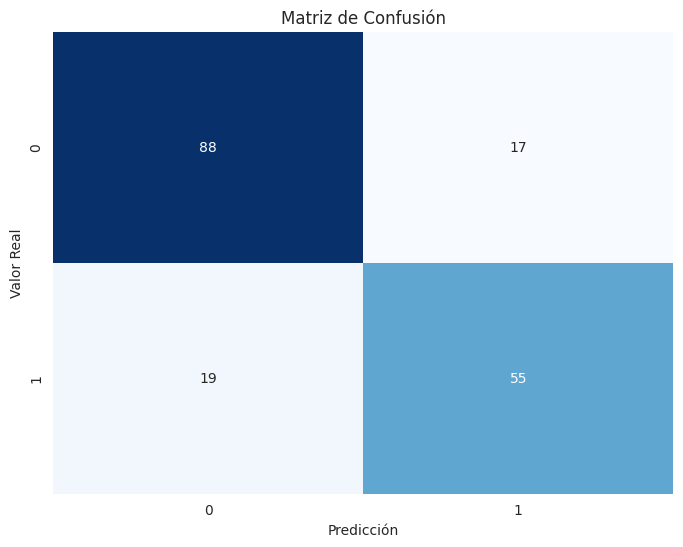

In [ ]:
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

## Función para evaluar modelos

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(533, 6)
(178, 6)
(533,)
(178,)


In [ ]:
def optimize_model( X_train, X_test, y_train, y_test,model_type, param_grid):
  # Definir el modelo base según el tipo
    # Diccionario de modelos
    model_switch = {
        'SVM': SVC,
        'RandomForest': RandomForestClassifier,
        'LogisticRegression': LogisticRegression,
        'DecisionTreeClassifier': DecisionTreeClassifier,
        'GradientBoostingClassifier': GradientBoostingClassifier,
        'KNeighborsClassifier': KNeighborsClassifier,
        'GaussianNB': GaussianNB,
        'SGDClassifier': SGDClassifier,
        'MLPClassifier': MLPClassifier,
        'XGBClassifier': lambda: XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'AdaBoostClassifier': lambda: AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
    }

    if model_type not in model_switch:
        raise ValueError("Modelo no soportado.")

    # Obtener el modelo del diccionario
    model = model_switch[model_type]()

    # Realizar la búsqueda de los parametros con validación cruzada
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Mejores parámetros encontrados
    best_params= grid_search.best_params_

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Evaluar el modelo en el conjunto de validación
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)


    # Evaluar el modelo en el conjunto de prueba
    y_pred_test = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return best_model, best_params, val_accuracy, test_accuracy

In [ ]:
# Definir la cuadrícula de parámetros a buscar
param_grid_svm = {
    'C': [0.1, 1, 10],                 # Parámetro de regularización en SVM
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de función kernel
    #'gamma': ['scale', 'auto'],        # Controla la influencia de cada ejemplo (solo para ciertos kernels)
    #'degree': [2, 3, 4]                # Grado del polinomio (solo para el kernel 'poly')
}

# Definir los parámetros a optimizar y sus posibles valores
param_grid_random_forest = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# Definir los parámetros a optimizar y sus posibles valores
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Definir los parámetros a optimizar
param_grid_decission_tree = {
    'max_depth': [3, 5, 7, 10],           # Profundidad máxima del árbol. Controla el número máximo de niveles en el árbol.
    'min_samples_split': [2, 5, 10],      # Número mínimo de muestras necesarias para dividir un nodo.
    'min_samples_leaf': [1, 2, 4],        # Número mínimo de muestras que debe tener un nodo hoja.
    'criterion': ['gini', 'entropy']      # Función para medir la calidad de una división. 'gini' para el índice de Gini y 'entropy' para la ganancia de información.
}

# Definir los parámetros a optimizar
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],       # Número de árboles en el modelo. Más árboles pueden mejorar el rendimiento, pero aumentan el tiempo de entrenamiento.
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje. Controla el impacto de cada árbol individual en el modelo.
    'max_depth': [3, 5, 7],               # Profundidad máxima de los árboles individuales. Controla la complejidad de cada árbol.
    'subsample': [0.8, 0.9, 1.0]          # Proporción de muestras utilizadas para entrenar cada árbol. Usar menos del 100% puede ayudar a reducir el sobreajuste.
}

# Definir los parámetros a optimizar
param_grid_Kneighbors = {
    'n_neighbors': [3, 5, 7, 9],         # Número de vecinos a considerar. Más vecinos pueden hacer el modelo más robusto.
    'weights': ['uniform', 'distance'],  # Ponderación de los vecinos. 'uniform' pondera todos los vecinos por igual, 'distance' pondera más a los vecinos más cercanos.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo usado para computar los vecinos más cercanos.
    'p': [1, 2]  # Parámetro de la métrica de Minkowski. 1 es equivalente a la distancia de Manhattan y 2 a la distancia Euclidiana.
}

param_grid_gaussian = {
    'var_smoothing': [1e-09, 1e-08, 1e-07],  # Suavizado de la varianza
    'priors': [None, [0.6, 0.4], [0.5, 0.5]] # Prioridades de las clases
}


# Definir los parámetros a optimizar
param_grid_SGD = {
    'loss': ['hinge', 'log', 'modified_huber'],  # Función de pérdida a utilizar
    'penalty': ['l2', 'l1', 'elasticnet'],       # Término de penalización
    'alpha': [1e-4, 1e-3, 1e-2],                 # Tasa de regularización
    'max_iter': [1000, 2000, 3000]               # Número máximo de iteraciones
}

# Definir los parámetros a optimizar
param_grid_MLP = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],  # Tamaños de las capas ocultas
    'activation': ['tanh', 'relu'],                 # Función de activación
    'solver': ['sgd', 'adam'],                      # Algoritmo de optimización
    'alpha': [1e-4, 1e-3, 1e-2]                     # Tasa de regularización
}

# Definir los parámetros a optimizar
param_grid_XGB = {
    'n_estimators': [100, 200, 300],    # Número de árboles
    'max_depth': [3, 5, 7],             # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0]        # Submuestreo de los datos
}

# Definir los parámetros a optimizar
param_grid_AdaBoost = {
    'n_estimators': [50, 100, 200],      # Número de árboles
    'learning_rate': [0.01, 0.1, 1.0],  # Tasa de aprendizaje
    'base_estimator__max_depth': [1, 2, 3]  # Profundidad máxima del estimador base
}

model_types = [
        {'model_type': 'SVM', 'params': param_grid_svm},
        {'model_type': 'RandomForest', 'params':param_grid_random_forest},
        {'model_type': 'LogisticRegression', 'params':param_grid_logistic},
        {'model_type': 'DecisionTreeClassifier', 'params':param_grid_decission_tree},
        {'model_type': 'GradientBoostingClassifier', 'params':param_grid_gradient_boosting},
        {'model_type': 'KNeighborsClassifier', 'params':param_grid_Kneighbors},
        {'model_type': 'GaussianNB', 'params':param_grid_gaussian},
        {'model_type': 'SGDClassifier', 'params':param_grid_SGD},
        {'model_type': 'MLPClassifier', 'params':param_grid_MLP},
        {'model_type': 'XGBClassifier', 'params':param_grid_XGB},
        {'model_type': 'AdaBoostClassifier', 'params':param_grid_AdaBoost}
    ]

In [ ]:
# Lista para almacenar los resultados
results = []
# Opción B con dataframe
resultsDF=pd.DataFrame(columns=['Model','Best Params','Val_accuracy','Test_accuracy'])

In [ ]:
# Entrenar y almacenar resultados para cada modelo
for model_info in model_types:
    model_type = model_info['model_type']
    model_params = model_info['params']
    print("Evaluando: ",model_type)

    best_model, best_params, val_accuracy, test_accuracy = optimize_model(X_train, X_test, y_train, y_test, model_type, model_params)
    results.append({
        'Model': model_type,
        'Best Params': best_params,
        'Val_accuracy': val_accuracy,
        'Test_accuracy': test_accuracy
    })
    resultsDF.loc[len(resultsDF)]=[model_type,best_params,val_accuracy,test_accuracy]

Evaluando:  SVM
Evaluando:  RandomForest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Evaluando:  LogisticRegression
Evaluando:  DecisionTreeClassifier
Evaluando:  GradientBoostingClassifier
Evaluando:  KNeighborsClassifier
Evaluando:  GaussianNB
Evaluando:  SGDClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Evaluando:  MLPClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Evaluando:  XGBClassifier
Evaluando:  AdaBoostClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)


In [ ]:
results_df

,Model,Best Params,Val_accuracy,Test_accuracy
0,SVM,"{'C': 10, 'kernel': 'poly'}",0.808989,0.792135
1,RandomForest,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.808989,0.747191
2,LogisticRegression,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.814607,0.820225
3,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.808989,0.808989
4,GradientBoostingClassifier,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.831461,0.803371
5,KNeighborsClassifier,"{'algorithm': 'ball_tree', 'n_neighbors': 9, '...",0.814607,0.775281
6,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.820225,0.780899
7,SGDClassifier,"{'alpha': 0.001, 'loss': 'hinge', 'max_iter': ...",0.820225,0.797753
8,MLPClassifier,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.820225,0.808989
9,XGBClassifier,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.825843,0.803371


In [ ]:
resultsDF